### Can we identify any geographical hotspots for specific types of incidents, like assassinations, kidnapping, ambush, bombing, car-ramming, suicide bombings,  or IED attacks?

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('D:/sem 4/DAEN 690/Project/sprint 3/GRID_PERPS_ISIS_ALQAIDA_NEW.csv')


# Grouping the data by country and summing the number of occurrences for each type of incident, including bombings
incident_counts_updated = data.groupby('country_genc_txt').agg({
    'is_assassination': 'sum',
    'is_ied': 'sum',
    'is_suicide': 'sum',
    'tactic_lvl2_tr_04': 'sum',
    'tactic_lvl2_tr_05': 'sum',
    'tactic_lvl2_cv_02': 'sum',
    'tactic_lvl2_tr_06': 'sum',
    'tactic_lvl2_as_04': 'sum'
}).reset_index()

# Renaming columns for clarity
incident_counts_updated.columns = [
    'Country',
    'Assassinations',
    'IED Attacks',
    'Suicide Bombings (is_suicide)',
    'Suicide Bombings (tactic_lvl2_tr_04)',
    'Kidnappings',
    'Ambushes',
    'Car-Rammings',
    'Bombings'
]

# Combining the two columns for suicide bombings into one
incident_counts_updated['Suicide Bombings'] = incident_counts_updated['Suicide Bombings (is_suicide)'] + incident_counts_updated['Suicide Bombings (tactic_lvl2_tr_04)']
incident_counts_updated.drop(['Suicide Bombings (is_suicide)', 'Suicide Bombings (tactic_lvl2_tr_04)'], axis=1, inplace=True)

# Sorting the data by the sum of all incidents for each country to identify hotspots
incident_counts_updated['Total Incidents'] = incident_counts_updated.iloc[:, 1:].sum(axis=1)
incident_counts_sorted_updated = incident_counts_updated.sort_values('Total Incidents', ascending=False)

# Displaying the top few countries by total incidents
print(incident_counts_sorted_updated.head(10))


             Country  Assassinations  IED Attacks  Kidnappings  Ambushes  \
27           SOMALIA              99          379           40        53   
28             SYRIA              21          218           64       108   
12              IRAQ              17          386           85        23   
6   CONGO (KINSHASA)               1            9          210        78   
0        AFGHANISTAN               2           91            4         3   
7              EGYPT               2           70           18        14   
23          PAKISTAN               0           50            1         3   
22           NIGERIA               2           28           38        43   
18              MALI               6           47           16        20   
15             KENYA               1           47           18        11   

    Car-Rammings  Bombings  Suicide Bombings  Total Incidents  
27             3       457               246             1277  
28             1       524         

In [2]:
# To show all the columns
pd.set_option('display.max.rows',None,'display.max_columns', None)

In [3]:
# Load the dataset
data_new = pd.read_csv('D:/sem 4/DAEN 690/Project/sprint 3/GRID_PERPS_ISIS_ALQAIDA_NEW.csv')
  

# Extracting the 'year' from the 'incident_date' column
data_new['year'] = pd.to_datetime(data_new['incident_date'], format='%d-%m-%Y %H:%M').dt.year

# Grouping the data by year and country and summing the number of occurrences for each type of incident
yearly_incident_counts_new = data_new.groupby(['year', 'country_genc_txt']).agg({
    'is_assassination': 'sum',
    'is_ied': 'sum',
    'is_suicide': 'sum',
    'tactic_lvl2_tr_04': 'sum',
    'tactic_lvl2_tr_05': 'sum',
    'tactic_lvl2_cv_02': 'sum',
    'tactic_lvl2_tr_06': 'sum',
    'tactic_lvl2_as_04': 'sum'
}).reset_index()

# Renaming columns for clarity
yearly_incident_counts_new.columns = [
    'Year',
    'Country',
    'Assassinations',
    'IED Attacks',
    'Suicide Bombings (is_suicide)',
    'Suicide Bombings (tactic_lvl2_tr_04)',
    'Kidnappings',
    'Ambushes',
    'Car-Rammings',
    'Bombings'
]

# Combining the two columns for suicide bombings into one
yearly_incident_counts_new['Suicide Bombings'] = yearly_incident_counts_new['Suicide Bombings (is_suicide)'] + yearly_incident_counts_new['Suicide Bombings (tactic_lvl2_tr_04)']
yearly_incident_counts_new.drop(['Suicide Bombings (is_suicide)', 'Suicide Bombings (tactic_lvl2_tr_04)'], axis=1, inplace=True)

# Sorting the data by year and the sum of all incidents for each country to identify hotspots
yearly_incident_counts_new['Total Incidents'] = yearly_incident_counts_new.iloc[:, 2:-1].sum(axis=1)
yearly_incident_counts_sorted_new = yearly_incident_counts_new.sort_values(['Year', 'Total Incidents'], ascending=[True, False])

yearly_incident_counts_sorted_new  # Displaying the top incidents for each year


Year           Country  Assassinations  IED Attacks  Kidnappings  \
18   2018           SOMALIA              51          135            9   
8    2018              IRAQ              14          123           25   
19   2018             SYRIA               7           36           10   
0    2018       AFGHANISTAN               2           27            1   
17   2018       PHILIPPINES               0           26            0   
10   2018             KENYA               1           18            1   
16   2018          PAKISTAN               0           19            1   
13   2018              MALI               3           10            7   
4    2018             EGYPT               2           11            0   
3    2018  CONGO (KINSHASA)               0            0           10   
6    2018             INDIA               2            0            8   
1    2018      BURKINA FASO               2            2            2   
9    2018            JORDAN               0            2            0   
15   2018           NIGERIA               0            1            1   
2    2018          CAMEROON               1            0            0   
11   2018           LEBANON               0            0            0   
5    2018            FRANCE               0            0            0   
7    2018              IRAN               0            0            0   
12   2018             LIBYA               0            0            0   
14   2018           MOROCCO               0            0            0   
20   2018        TAJIKISTAN               0            0            0   
21   2018             YEMEN               0            0            0   
39   2019           SOMALIA              14          142            8   
29   2019              IRAQ               2          159            9   
40   2019             SYRIA               7           83           18   
27   2019             EGYPT               0           25            6   
22   2019       AFGHANISTAN               0           20            2   
32   2019              MALI               1           14            0   
36   2019          PAKISTAN               0           19            0   
26   2019  CONGO (KINSHASA)               0            2           20   
35   2019           NIGERIA               1            5            5   
37   2019       PHILIPPINES               0            9            0   
30   2019             KENYA               0            7            5   
34   2019             NIGER               2            4            7   
23   2019      BURKINA FASO               0            0            2   
28   2019             INDIA               0            0            1   
31   2019           LEBANON               0            1            0   
42   2019            TURKEY               0            1            0   
33   2019        MOZAMBIQUE               0            0            0   
43   2019             YEMEN               0            0            0   
24   2019          CAMEROON               0            0            0   
25   2019              CHAD               0            0            0   
38   2019      SAUDI ARABIA               0            0            0   
41   2019        TAJIKISTAN               0            0            0   
63   2020             SYRIA               0            0           18   
62   2020           SOMALIA               0            0           15   
49   2020  CONGO (KINSHASA)               0            0           39   
52   2020              IRAQ               0            0           20   
58   2020           NIGERIA               0            0           12   
53   2020             KENYA               0            0            8   
46   2020      BURKINA FASO               0            0            1   
55   2020              MALI               0            0            3   
56   2020        MOZAMBIQUE               0            0            7   
50   2020             EGYPT               0            0       

In [4]:
# Grouping the data by year alone and summing the number of occurrences for each type of incident
yearly_totals = yearly_incident_counts_sorted_new.groupby('Year').agg({
    'Assassinations': 'sum',
    'IED Attacks': 'sum',
    'Suicide Bombings': 'sum',
    'Kidnappings': 'sum',
    'Ambushes': 'sum',
    'Car-Rammings': 'sum',
    'Bombings': 'sum',
    'Total Incidents': 'sum'
}).reset_index()

yearly_totals


Year  Assassinations  IED Attacks  Suicide Bombings  Kidnappings  Ambushes  \
0  2018              85          410               261           75         0   
1  2019              27          491               206           83       101   
2  2020               0            0                48          131       123   
3  2021              15          245                98          144        82   
4  2022              32          250               139          137       100   

   Car-Rammings  Bombings  Total Incidents  
0             0       403              973  
1             3       687             1392  
2             1       239              494  
3             3       164              653  
4             4       215              738

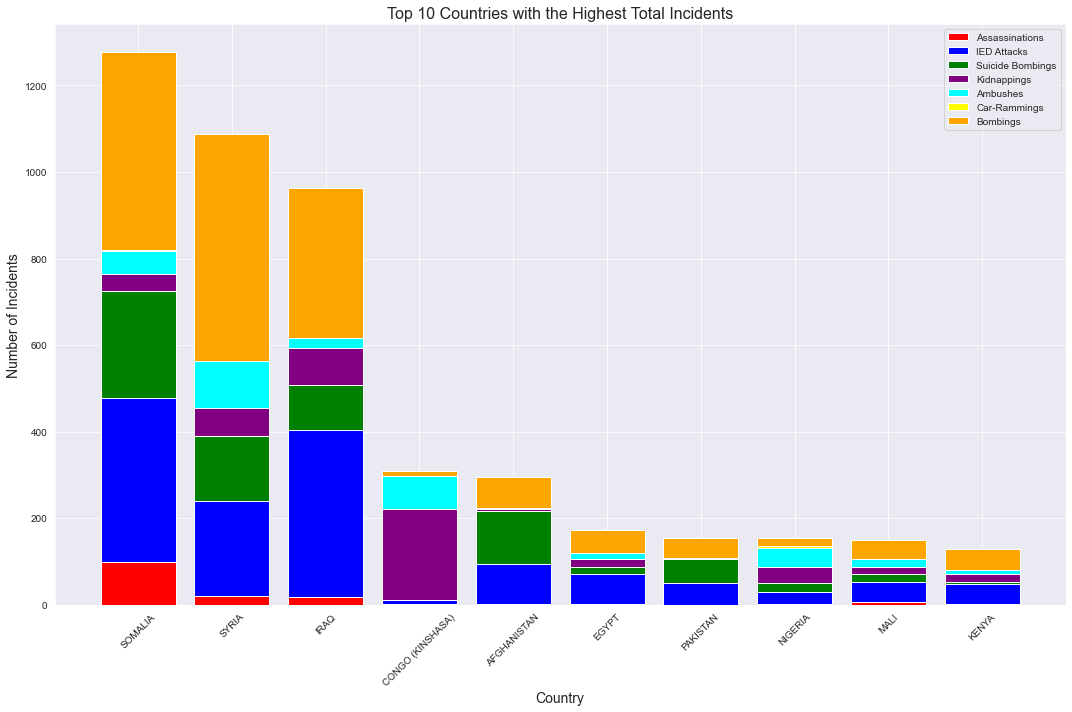

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Taking the top 10 countries
top_countries = incident_counts_sorted_updated.head(10)

# Setting up the figure and axis
plt.figure(figsize=(15, 10))
sns.set_style("darkgrid")

# Creating a stacked bar chart
plt.bar(top_countries['Country'], top_countries['Assassinations'], label='Assassinations', color='red')
plt.bar(top_countries['Country'], top_countries['IED Attacks'], bottom=top_countries['Assassinations'], label='IED Attacks', color='blue')
plt.bar(top_countries['Country'], top_countries['Suicide Bombings'], bottom=top_countries['Assassinations'] + top_countries['IED Attacks'], label='Suicide Bombings', color='green')
plt.bar(top_countries['Country'], top_countries['Kidnappings'], bottom=top_countries['Assassinations'] + top_countries['IED Attacks'] + top_countries['Suicide Bombings'], label='Kidnappings', color='purple')
plt.bar(top_countries['Country'], top_countries['Ambushes'], bottom=top_countries['Assassinations'] + top_countries['IED Attacks'] + top_countries['Suicide Bombings'] + top_countries['Kidnappings'], label='Ambushes', color='cyan')
plt.bar(top_countries['Country'], top_countries['Car-Rammings'], bottom=top_countries['Assassinations'] + top_countries['IED Attacks'] + top_countries['Suicide Bombings'] + top_countries['Kidnappings'] + top_countries['Ambushes'], label='Car-Rammings', color='yellow')
plt.bar(top_countries['Country'], top_countries['Bombings'], bottom=top_countries['Assassinations'] + top_countries['IED Attacks'] + top_countries['Suicide Bombings'] + top_countries['Kidnappings'] + top_countries['Ambushes'] + top_countries['Car-Rammings'], label='Bombings', color='orange')

# Setting the title and labels
plt.title('Top 10 Countries with the Highest Total Incidents', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.xticks(rotation=45)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


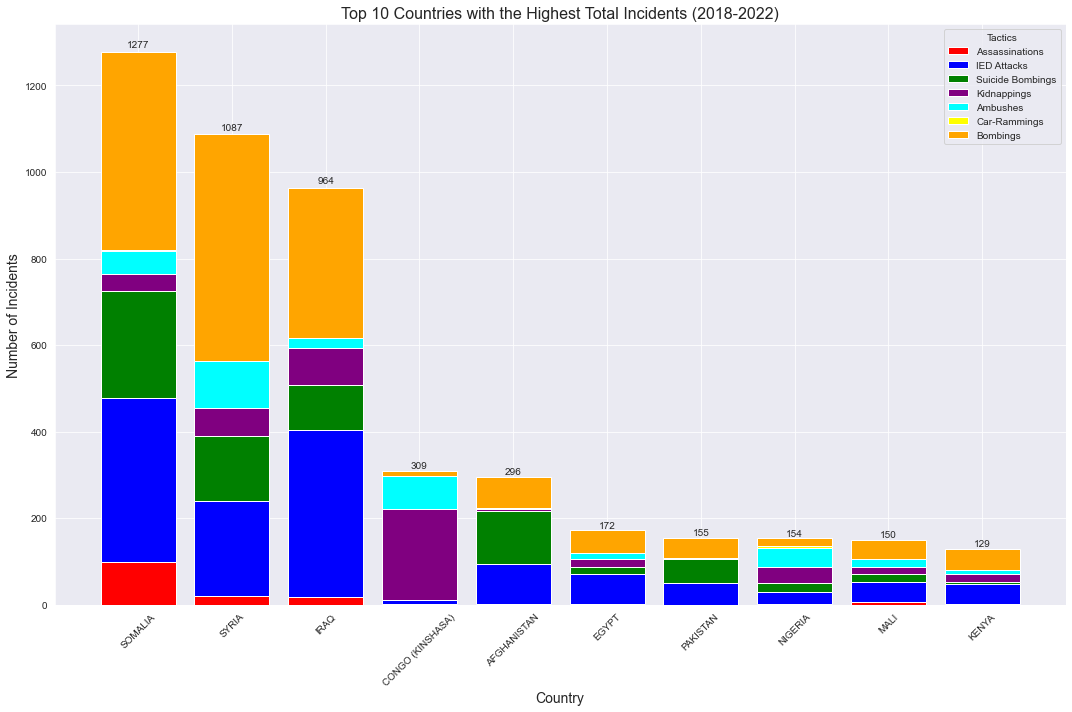

In [6]:
# Redrawing the stacked bar chart with annotations for the total incident count for each country
plt.figure(figsize=(15, 10))


# Creating the stacked bar chart again
bar1 = plt.bar(top_countries['Country'], top_countries['Assassinations'], label='Assassinations', color='red')
bar2 = plt.bar(top_countries['Country'], top_countries['IED Attacks'], bottom=top_countries['Assassinations'], label='IED Attacks', color='blue')
bar3 = plt.bar(top_countries['Country'], top_countries['Suicide Bombings'], bottom=top_countries['Assassinations'] + top_countries['IED Attacks'], label='Suicide Bombings', color='green')
bar4 = plt.bar(top_countries['Country'], top_countries['Kidnappings'], bottom=top_countries['Assassinations'] + top_countries['IED Attacks'] + top_countries['Suicide Bombings'], label='Kidnappings', color='purple')
bar5 = plt.bar(top_countries['Country'], top_countries['Ambushes'], bottom=top_countries['Assassinations'] + top_countries['IED Attacks'] + top_countries['Suicide Bombings'] + top_countries['Kidnappings'], label='Ambushes', color='cyan')
bar6 = plt.bar(top_countries['Country'], top_countries['Car-Rammings'], bottom=top_countries['Assassinations'] + top_countries['IED Attacks'] + top_countries['Suicide Bombings'] + top_countries['Kidnappings'] + top_countries['Ambushes'], label='Car-Rammings', color='yellow')
bar7 = plt.bar(top_countries['Country'], top_countries['Bombings'], bottom=top_countries['Assassinations'] + top_countries['IED Attacks'] + top_countries['Suicide Bombings'] + top_countries['Kidnappings'] + top_countries['Ambushes'] + top_countries['Car-Rammings'], label='Bombings', color='orange')

# Adding the total incident count annotations on top of the bars
for idx, rect in enumerate(bar7):
    height = rect.get_height() + rect.get_y()
    plt.text(rect.get_x() + rect.get_width()/2., 1.005*height,
            f'{top_countries["Total Incidents"].iloc[idx]}',
            ha='center', va='bottom')

# Setting the title and labels
plt.title('Top 10 Countries with the Highest Total Incidents (2018-2022)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Tactics')

# Displaying the plot
plt.tight_layout()
plt.show()


### What are the types of Tactics employed by ISIS and Al-Qaeda ?

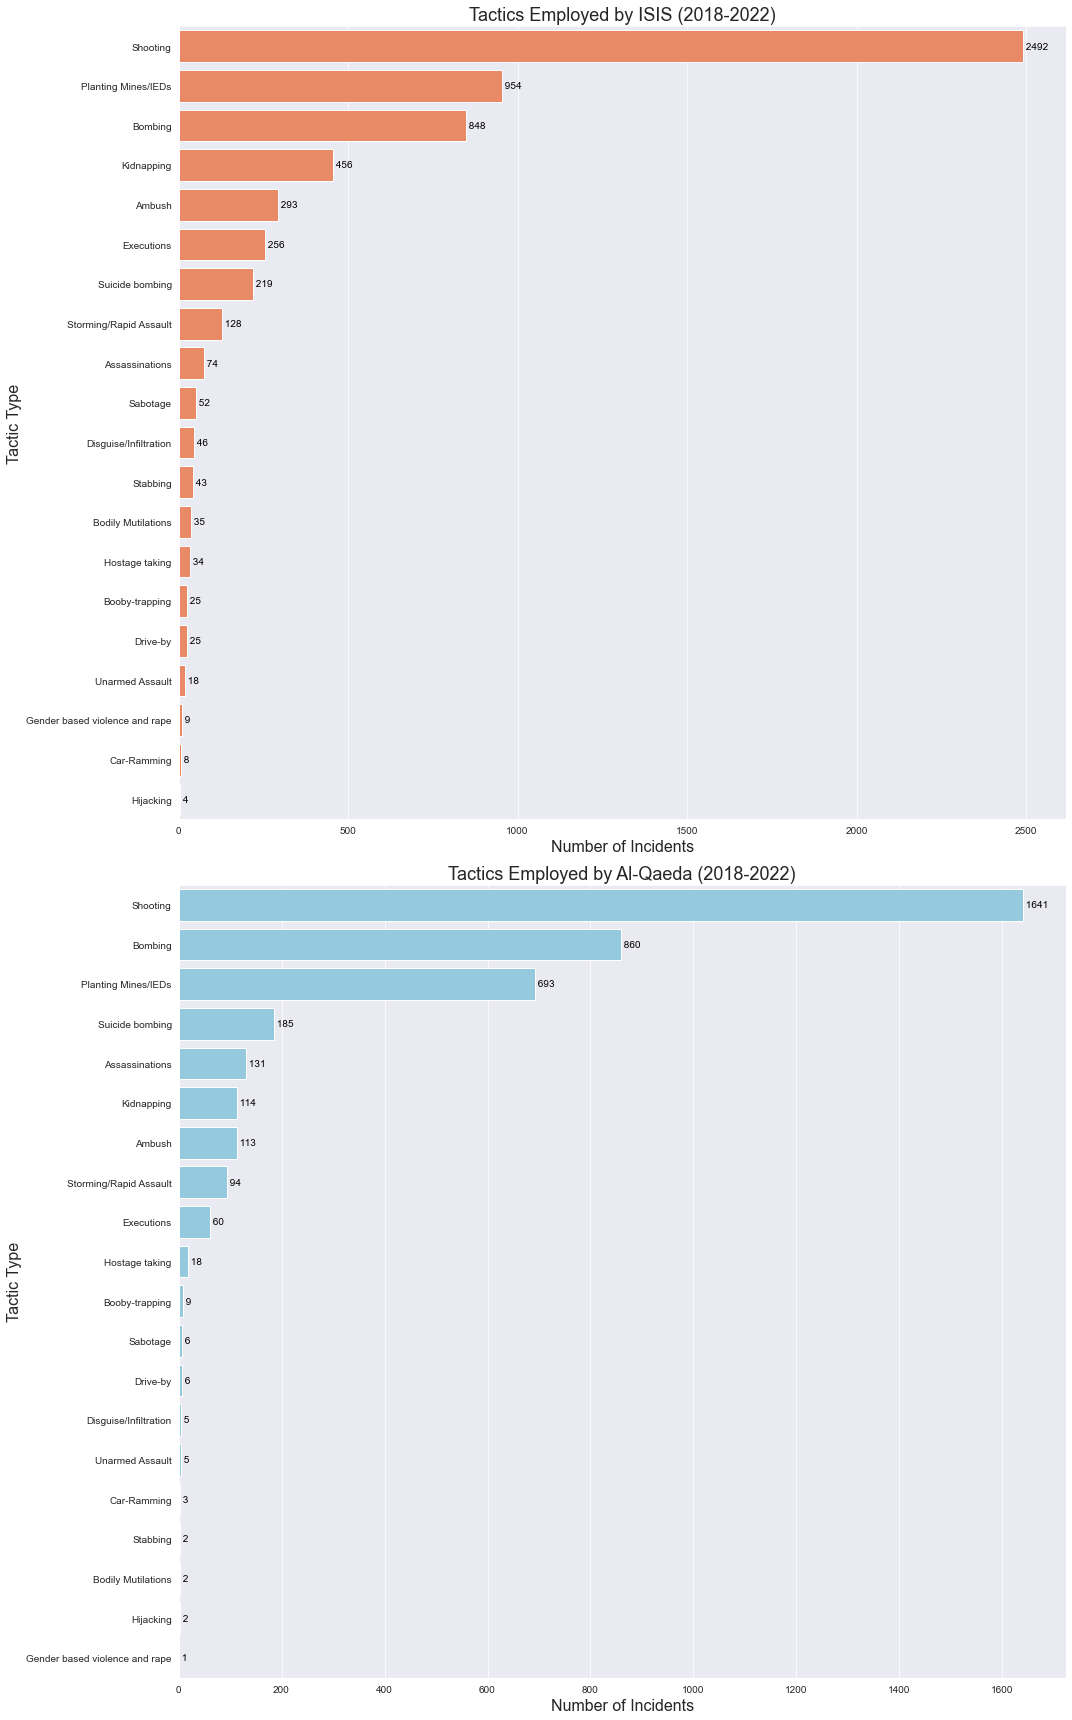

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the new dataset from the Excel file
df_new = pd.read_csv('D:/sem 4/DAEN 690/Project/sprint 3/GRID_PERPS_ISIS_ALQAIDA_NEW.csv') 
# Define the tactic columns and their corresponding names
tactic_columns = {
    "tactic_lvl2_as_01": "Shooting",
    "tactic_lvl2_as_04": "Bombing",
    "tactic_lvl2_cv_04": "Planting Mines/IEDs",
    "tactic_lvl2_tr_05": "Kidnapping",
    "tactic_lvl2_cv_02": "Ambush",
    "tactic_lvl2_tr_04": "Suicide bombing",
    "tactic_lvl2_tr_02": "Executions",
    "tactic_lvl2_as_02": "Storming/Rapid Assault",
    "tactic_lvl2_tr_08": "Assassinations",
    "tactic_lvl2_cv_03": "Sabotage",
    "tactic_lvl2_tr_07": "Hostage taking",
    "tactic_lvl2_cv_05": "Disguise/Infiltration",
    "tactic_lvl2_tr_09": "Stabbing",
    "tactic_lvl2_tr_03": "Bodily Mutilations",
    "tactic_lvl2_cv_01": "Booby-trapping",
    "tactic_lvl2_as_03": "Drive-by",
    "tactic_lvl2_as_05": "Unarmed Assault",
    "tactic_lvl2_tr_01": "Gender based violence and rape",
    "tactic_lvl2_tr_06": "Car-Ramming",
    "tactic_lvl2_tr_10": "Hijacking",
}

sns.set_style("darkgrid")
# Extract counts for each tactic 
tactic_counts_new_updated = df_new[list(tactic_columns.keys())].sum()

# Rename indices based on the tactic names
tactic_counts_new_updated = tactic_counts_new_updated.rename(index=tactic_columns)

# Sort the counts in descending order
sorted_tactic_counts_new_updated = tactic_counts_new_updated.sort_values(ascending=False)

# Convert series to DataFrame with headers for the updated dataset
sorted_tactic_counts_df_new_updated = sorted_tactic_counts_new_updated.reset_index()
sorted_tactic_counts_df_new_updated.columns = ["Incident Type", "count"]

# Filtering the updated dataset for incidents affiliated with ISIS and Al-Qaeda
isis_affiliated_new_updated = df_new[df_new['affiliated_organization'].str.contains('ISIS', case=False, na=False)]
alqaeda_affiliated_new_updated = df_new[df_new['affiliated_organization'].str.contains('Al-Qaeda', case=False, na=False)]

# Counting the number of each updated incident type for ISIS and "Al-Qaeda" affiliated incidents
isis_incident_counts_new_updated = isis_affiliated_new_updated[list(tactic_columns.keys())].sum().rename(tactic_columns)
alqaeda_incident_counts_new_updated = alqaeda_affiliated_new_updated[list(tactic_columns.keys())].sum().rename(tactic_columns)

# Sorting the counts in descending order for the updated counts
sorted_isis_incidents_new_updated = isis_incident_counts_new_updated.sort_values(ascending=False)
sorted_alqaeda_incidents_new_updated = alqaeda_incident_counts_new_updated.sort_values(ascending=False)

# Convert series to DataFrame for plotting for the updated dataset
sorted_isis_incidents_df_new_updated = sorted_isis_incidents_new_updated.reset_index()
sorted_alqaeda_incidents_df_new_updated = sorted_alqaeda_incidents_new_updated.reset_index()
sorted_isis_incidents_df_new_updated.columns = ["Incident Type", "Count"]
sorted_alqaeda_incidents_df_new_updated.columns = ["Incident Type", "Count"]

# Updating the plot with specified colors for ISIS and Al-Qaeda

# ISIS color: Coral (#FF7F50)
# Al-Qaeda color: Sky Blue (#87CEEB)

# Replotting the bar charts with the specified colors
fig, axes = plt.subplots(2, 1, figsize=(15, 24))

# ISIS affiliated incident counts bar chart with specified color
sns.barplot(ax=axes[0], x=sorted_isis_incidents_df_new_updated['Count'], y=sorted_isis_incidents_df_new_updated['Incident Type'], color="#FF7F50")
axes[0].set_title('Tactics Employed by ISIS (2018-2022)', fontsize=18)
axes[0].set_xlabel('Number of Incidents', fontsize=16)
axes[0].set_ylabel('Tactic Type', fontsize=16)

# Al-Qaeda affiliated incident counts bar chart with specified color
sns.barplot(ax=axes[1], x=sorted_alqaeda_incidents_df_new_updated['Count'], y=sorted_alqaeda_incidents_df_new_updated['Incident Type'], color="#87CEEB")
axes[1].set_title('Tactics Employed by Al-Qaeda (2018-2022)', fontsize=18)
axes[1].set_xlabel('Number of Incidents', fontsize=16)
axes[1].set_ylabel('Tactic Type', fontsize=16)

# Adding annotations for bar values for both ISIS and Al-Qaeda
for ax in axes:
    for p in ax.patches:
        ax.text(p.get_width(), p.get_y() + p.get_height() / 2, f' {p.get_width():.0f}', 
                color='black', ha="left", va="center", fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


### Which perpetrators are more involved in extortion in Africa ? 

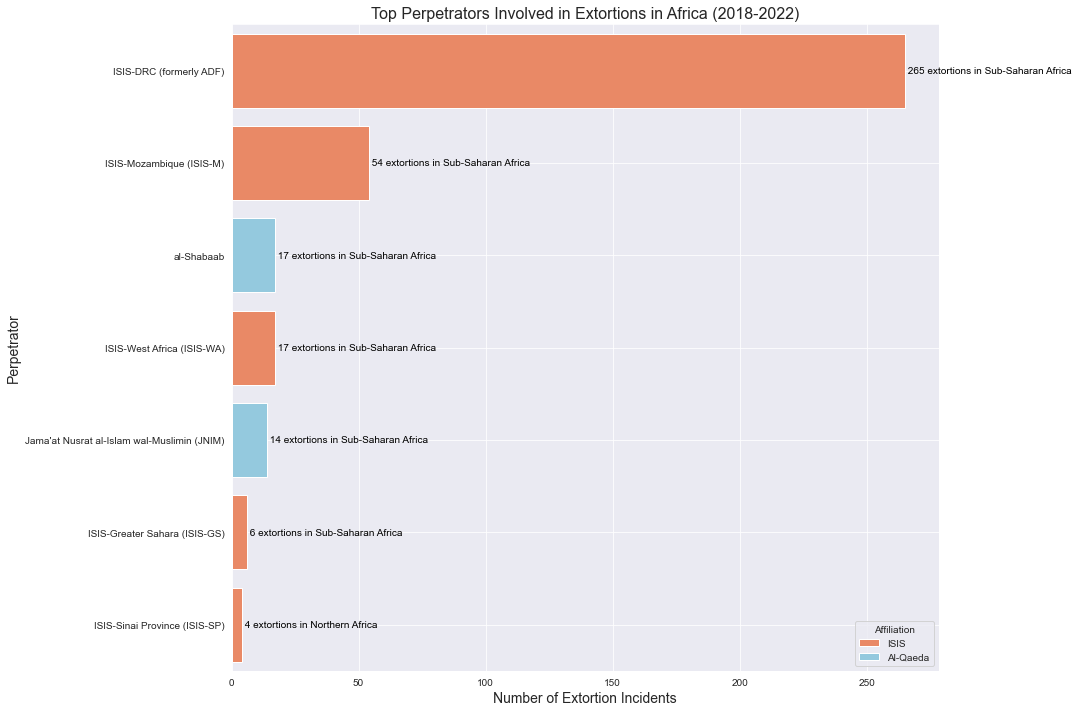

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('D:/sem 4/DAEN 690/Project/sprint 3/GRID_PERPS_ISIS_ALQAIDA_NEW.csv') 

# Filter the dataset for rows where extortion practices are involved
extortion_df = data[data['tactic_lvl2_ex_05'] == 1]

# Count the frequency of each perpetrator involved in extortion
perpetrator_extortion_counts = extortion_df['perp_name'].value_counts()

# Convert to DataFrame for readability
perpetrator_extortion_df = perpetrator_extortion_counts.reset_index()
perpetrator_extortion_df.columns = ['Perpetrator', 'Number of Extortion Incidents']

# Extract the top 15 perpetrators
top_perpetrators_table = perpetrator_extortion_df.head(15).copy()

# Extracting the affiliated organization and region for the top perpetrators
top_perpetrators_affiliation = extortion_df[extortion_df['perp_name'].isin(top_perpetrators_table['Perpetrator'])]\
    .groupby('perp_name')['affiliated_organization'].first()
top_perpetrators_regions = extortion_df[extortion_df['perp_name'].isin(top_perpetrators_table['Perpetrator'])]\
    .groupby('perp_name')['region_txt'].first()

# Adding the 'Affiliation' and 'Region' to the top_perpetrators_table DataFrame
top_perpetrators_table['Affiliation'] = top_perpetrators_table['Perpetrator'].map(top_perpetrators_affiliation)
top_perpetrators_table['Region'] = top_perpetrators_table['Perpetrator'].map(top_perpetrators_regions)

# Filter to include only Sub-Saharan Africa and Northern Africa
sub_saharan_northern_africa = top_perpetrators_table[top_perpetrators_table['Region'].isin(['Sub-Saharan Africa', 'Northern Africa'])]

# Define the red and blue hex codes for affiliations
palette = {'ISIS': '#FF7F50', 'Al-Qaeda': '#87CEEB'}

# Plotting the horizontal bar chart
plt.figure(figsize=(15, 10))
barplot = sns.barplot(
    x=sub_saharan_northern_africa['Number of Extortion Incidents'], 
    y=sub_saharan_northern_africa['Perpetrator'], 
    hue=sub_saharan_northern_africa['Affiliation'],
    palette=palette,
    dodge=False
)

# Adding annotations for incident counts and region names outside the bars
for index, (value, region) in enumerate(zip(sub_saharan_northern_africa['Number of Extortion Incidents'], sub_saharan_northern_africa['Region'])):
    barplot.text(value, index, f' {value} extortions in {region}', color='black', va="center", ha="left", fontsize=10)

# Adding grid lines
plt.grid(True)

# Setting title and labels
plt.title('Top Perpetrators Involved in Extortions in Africa (2018-2022)', fontsize=16)
plt.xlabel('Number of Extortion Incidents', fontsize=14)
plt.ylabel('Perpetrator', fontsize=14)
plt.legend(title='Affiliation')
plt.tight_layout()

# Display the horizontal bar chart
plt.show()


### What are the top 3 weapons used by ISIS and Al-Qaeda? 


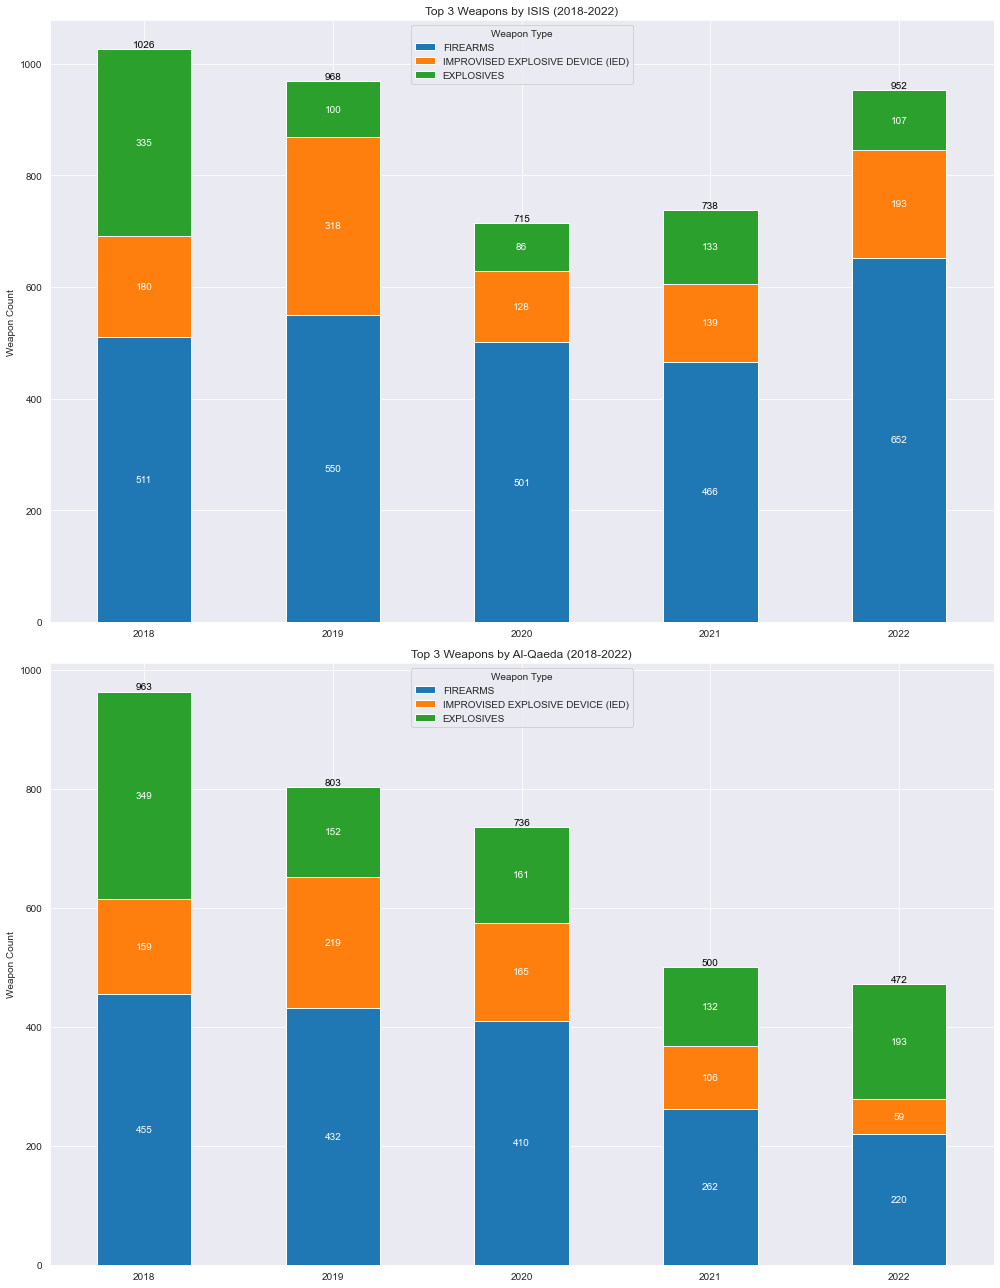

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('D:/sem 4/DAEN 690/Project/sprint 3/GRID_PERPS_ISIS_ALQAIDA_NEW.csv') 


# Convert 'incident_date' to 'year'
data['year'] = pd.to_datetime(data['incident_date'], errors='coerce').dt.year

# Define weapon columns and their descriptive names
weapon_columns_excluding_unknown = ['weapon_lvl1_fi', 'weapon_lvl1_im', 'weapon_lvl1_ex']
column_rename_map_excluding_unknown = {
    'weapon_lvl1_fi': 'FIREARMS',
    'weapon_lvl1_im': 'IMPROVISED EXPLOSIVE DEVICE (IED)',
    'weapon_lvl1_ex': 'EXPLOSIVES',
     'weapon_lvl1_in': 'incendiary'
}
color_map_excluding_unknown = {
    'FIREARMS': '#1f77b4',
    'IMPROVISED EXPLOSIVE DEVICE (IED)': '#ff7f0e',
    'EXPLOSIVES': '#2ca02c',
    'INCENDIARY': '#FF0000' 
}

# Function to plot stacked weapon counts with total annotations
def plot_stacked_weapon_counts_with_total_annotations(data_filtered, org_name, ax):
    yearly_counts = data_filtered.groupby('year')[weapon_columns_excluding_unknown].sum()
    top_weapons = yearly_counts.rename(columns=column_rename_map_excluding_unknown)
    relevant_colors = [color_map_excluding_unknown[weapon] for weapon in top_weapons.columns]

    bars = top_weapons.plot(kind='bar', stacked=True, ax=ax, color=relevant_colors)

    # Annotating each bar segment with its count
    for bar in bars.patches:
        y_val = bar.get_height()
        x_val = bar.get_x() + bar.get_width() / 2
        if y_val > 0:  # Only annotate if the value is non-zero
            ax.text(x_val, y_val / 2 + bar.get_y(), int(y_val), ha='center', va='center', color='white')

    # Adding total count annotation at the top of each bar
    for i in range(len(top_weapons)):
        total_count = top_weapons.iloc[i].sum()
        ax.text(i, total_count, str(total_count), ha='center', va='bottom', color='black')

    ax.set_title(f"Top 3 Weapons by {org_name} (2018-2022)")
    ax.set_ylabel("Weapon Count")
    ax.set_xlabel("")
    ax.legend(loc='upper center',title="Weapon Type")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.grid(True)  # Adding grid

# Plotting stacked bar charts with total count annotations for ISIS and ALQAIDA
fig, axs = plt.subplots(2, 1, figsize=(14, 18))

# Filtering the dataset for ISIS and ALQAIDA
data_isis = data[data['affiliated_organization'].str.contains('ISIS', na=False, case=False)]
data_alqaida = data[data['affiliated_organization'].str.contains('Al-Qaeda', na=False, case=False)]

plot_stacked_weapon_counts_with_total_annotations(data_isis, 'ISIS', axs[0])
plot_stacked_weapon_counts_with_total_annotations(data_alqaida, 'Al-Qaeda', axs[1])

plt.tight_layout()
plt.show()


### Are there specific types of weapons in which ISIS or Al Qaeda groups more prefer to use? 

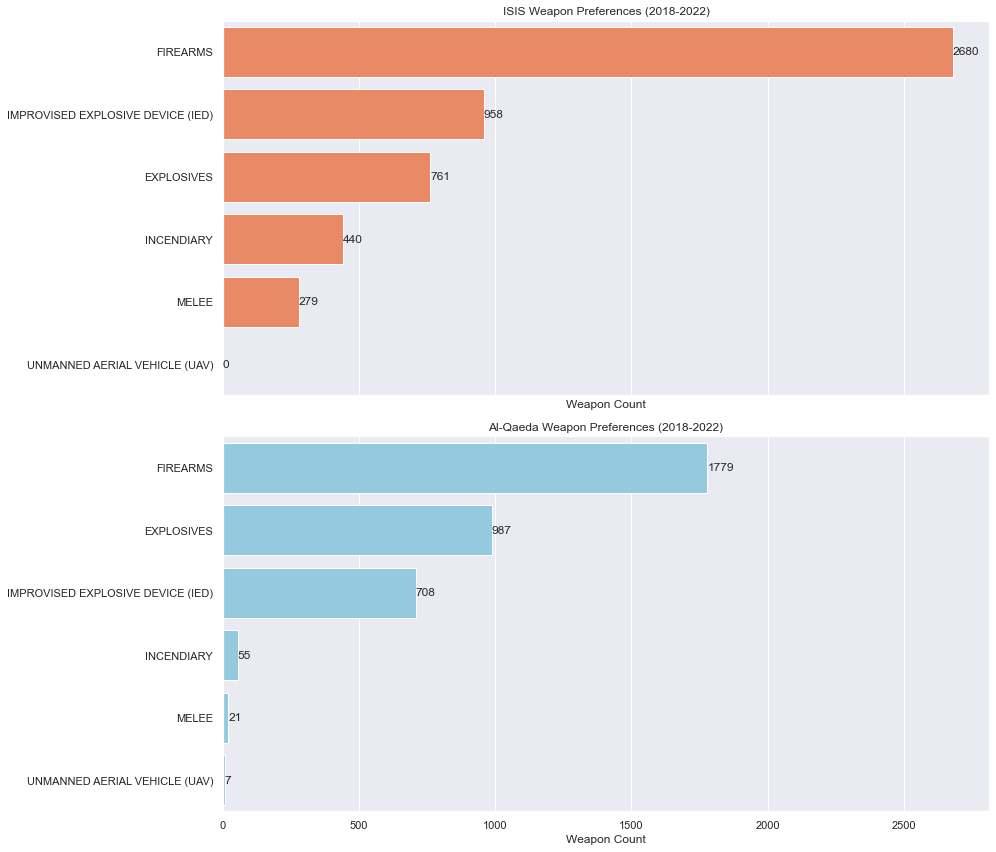

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('D:/sem 4/DAEN 690/Project/sprint 3/GRID_PERPS_ISIS_ALQAIDA_NEW.csv')

# Renaming columns
column_name_mapping = {
    'weapon_lvl1_fi': 'FIREARMS',
    'weapon_lvl1_im': 'IMPROVISED EXPLOSIVE DEVICE (IED)',
    'weapon_lvl1_ex': 'EXPLOSIVES',
    'weapon_lvl1_ua': 'UNMANNED AERIAL VEHICLE (UAV)',
    'weapon_lvl1_in': 'INCENDIARY',
    'weapon_lvl1_ml': 'MELEE',
}

# Rename columns in the dataset
data_renamed = data.rename(columns=column_name_mapping)

# Filter the dataset for incidents related to ISIS and Al Qaeda
isis_data = data_renamed[data_renamed['affiliated_organization'] == 'ISIS']
alqaida_data = data_renamed[data_renamed['affiliated_organization'] == 'Al-Qaeda']

# Compute the frequency of each weapon category for ISIS and Al Qaeda
weapon_frequencies_isis = isis_data[list(column_name_mapping.values())].sum()
weapon_frequencies_alqaida = alqaida_data[list(column_name_mapping.values())].sum()

# Sort the frequencies in descending order
top_weapons_isis = weapon_frequencies_isis.sort_values(ascending=False)
top_weapons_alqaida = weapon_frequencies_alqaida.sort_values(ascending=False)

# Set the seaborn style
sns.set_style("darkgrid")

# Custom colors for ISIS and Al-Qaeda
isis_color = "#FF7F50"  # Coral color for ISIS
alqaeda_color = "#87CEEB"  # Sky blue color for Al-Qaeda

# Create the bar charts with custom colors
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# ISIS bar chart with coral color
sns.barplot(x=top_weapons_isis.values, y=top_weapons_isis.index, ax=axes[0], color=isis_color)
axes[0].set_title('ISIS Weapon Preferences (2018-2022)')
axes[0].set_xlabel('Weapon Count')
axes[0].set_ylabel('')

# Al Qaeda bar chart with sky blue color
sns.barplot(x=top_weapons_alqaida.values, y=top_weapons_alqaida.index, ax=axes[1], color=alqaeda_color)
axes[1].set_title('Al-Qaeda Weapon Preferences (2018-2022)')
axes[1].set_xlabel('Weapon Count')
axes[1].set_ylabel('')

# Adding count annotations to the bars
for ax in axes:
    for p in ax.patches:
        width = p.get_width()
        ax.text(width, p.get_y() + p.get_height() / 2,
                f'{int(width)}',  # Using f-string for formatting
                va='center')

# Adjust layout
plt.tight_layout()
plt.show()


###  Firearms Preferences by ISIS and Al-Qaeda 

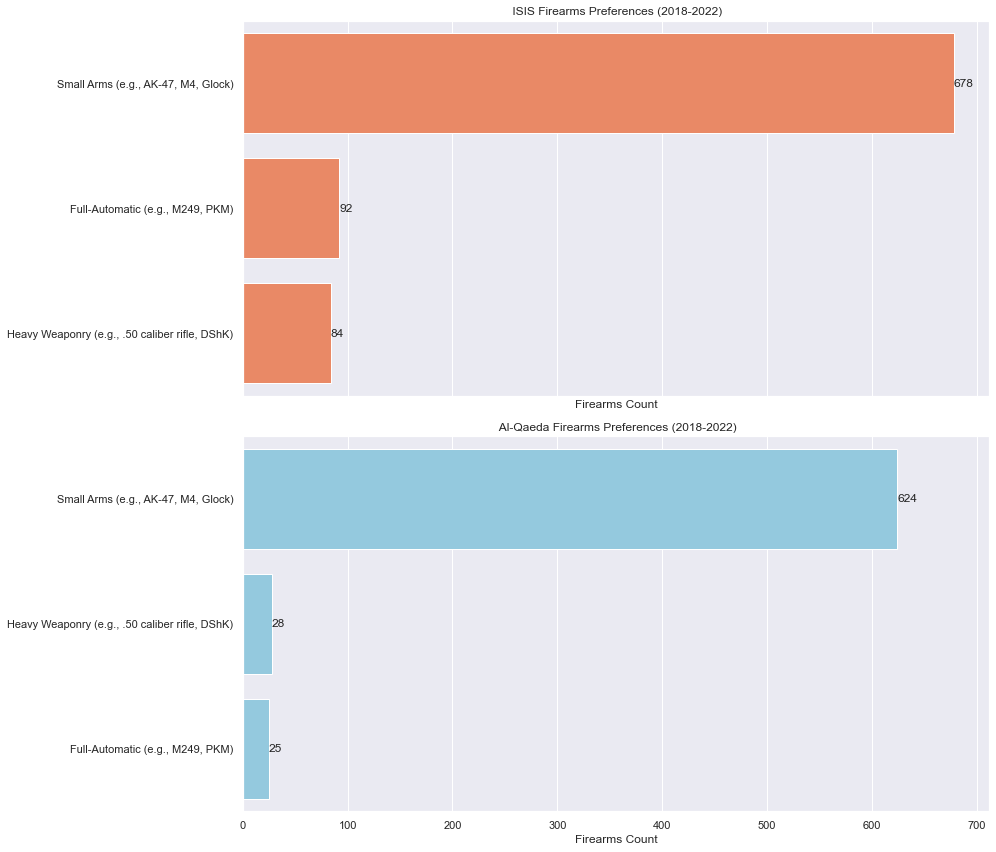

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('D:/sem 4/DAEN 690/Project/sprint 3/GRID_PERPS_ISIS_ALQAIDA_NEW.csv') 
# Renaming columns
column_name_mapping = {
   'weapon_lvl2_fi_02': 'Small Arms (e.g., AK-47, M4, Glock)',
    'weapon_lvl2_fi_03': 'Full-Automatic (e.g., M249, PKM)',
    'weapon_lvl2_fi_05': 'Heavy Weaponry (e.g., .50 caliber rifle, DShK)'
}

# Rename columns in the dataset
data_renamed = data.rename(columns=column_name_mapping)

# Filter the dataset for incidents related to ISIS and Al Qaeda
isis_data = data_renamed[data_renamed['affiliated_organization'] == 'ISIS']
alqaida_data = data_renamed[data_renamed['affiliated_organization'] == 'Al-Qaeda']

# Compute the frequency of each weapon category for ISIS and Al Qaeda
weapon_frequencies_isis = isis_data[list(column_name_mapping.values())].sum()
weapon_frequencies_alqaida = alqaida_data[list(column_name_mapping.values())].sum()

# Sort the frequencies in descending order and get the top 10
top_weapons_isis = weapon_frequencies_isis.sort_values(ascending=False).head(10)
top_weapons_alqaida = weapon_frequencies_alqaida.sort_values(ascending=False).head(10)

# Create the bar charts
sns.set(style="darkgrid")
# Custom colors for ISIS and Al-Qaeda
isis_color = "#FF7F50"  # Coral color for ISIS
alqaeda_color = "#87CEEB"  # Sky blue color for Al-Qaeda

# Create the bar charts with custom colors
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# ISIS bar chart
sns.barplot(x=top_weapons_isis.values, y=top_weapons_isis.index, ax=axes[0], color=isis_color)
axes[0].set_title(' ISIS Firearms Preferences (2018-2022)')
axes[0].set_xlabel('Firearms Count')
axes[0].set_ylabel('')

# Al Qaeda bar chart
sns.barplot(x=top_weapons_alqaida.values, y=top_weapons_alqaida.index, ax=axes[1], color=alqaeda_color)
axes[1].set_title(' Al-Qaeda Firearms Preferences (2018-2022)')
axes[1].set_xlabel('Firearms Count')
axes[1].set_ylabel('')

# Adding count annotations to the bars
for ax in axes:
    for p in ax.patches:
        width = p.get_width()
        ax.text(width, p.get_y() + p.get_height() / 2,
                f'{int(width)}',  # Using f-string for formatting
                va='center')

# Adjust layout
plt.tight_layout()
plt.show()


###  IMPROVISED EXPLOSIVE DEVICE (IED) Preferences by ISIS and Al-Qaeda 

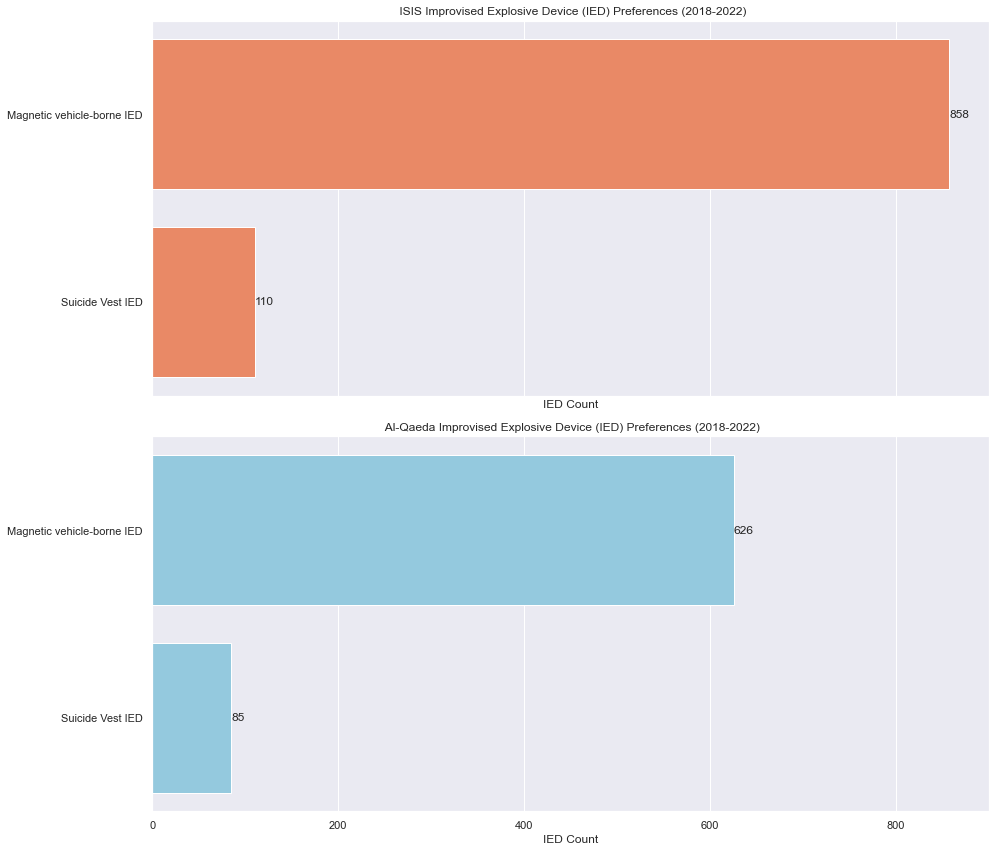

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('D:/sem 4/DAEN 690/Project/sprint 3/GRID_PERPS_ISIS_ALQAIDA_NEW.csv') 
# Renaming columns
column_name_mapping = {
  'weapon_lvl2_im_03': 'Suicide Vest IED',
  'weapon_lvl2_im_04': 'Magnetic vehicle-borne IED'
}

# Rename columns in the dataset
data_renamed = data.rename(columns=column_name_mapping)

# Filter the dataset for incidents related to ISIS and Al Qaeda
isis_data = data_renamed[data_renamed['affiliated_organization'] == 'ISIS']
alqaida_data = data_renamed[data_renamed['affiliated_organization'] == 'Al-Qaeda']

# Compute the frequency of each weapon category for ISIS and Al Qaeda
weapon_frequencies_isis = isis_data[list(column_name_mapping.values())].sum()
weapon_frequencies_alqaida = alqaida_data[list(column_name_mapping.values())].sum()

# Sort the frequencies in descending order and get the top 10
top_weapons_isis = weapon_frequencies_isis.sort_values(ascending=False).head(10)
top_weapons_alqaida = weapon_frequencies_alqaida.sort_values(ascending=False).head(10)

# Create the bar charts
sns.set(style="darkgrid")
# Custom colors for ISIS and Al-Qaeda
isis_color = "#FF7F50"  # Coral color for ISIS
alqaeda_color = "#87CEEB"  # Sky blue color for Al-Qaeda

fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# ISIS bar chart
sns.barplot(x=top_weapons_isis.values, y=top_weapons_isis.index, ax=axes[0], color=isis_color)
axes[0].set_title(' ISIS Improvised Explosive Device (IED) Preferences (2018-2022)')
axes[0].set_xlabel('IED Count')
axes[0].set_ylabel('')

# Al Qaeda bar chart
sns.barplot(x=top_weapons_alqaida.values, y=top_weapons_alqaida.index, ax=axes[1], color=alqaeda_color)
axes[1].set_title(' Al-Qaeda Improvised Explosive Device (IED) Preferences (2018-2022)')
axes[1].set_xlabel('IED Count')
axes[1].set_ylabel('')

# Adding count annotations to the bars
for ax in axes:
    for p in ax.patches:
        width = p.get_width()
        ax.text(width, p.get_y() + p.get_height() / 2,
                f'{int(width)}',  # Using f-string for formatting
                va='center')

# Adjust layout
plt.tight_layout()
plt.show()


###  Explosives Preferences by ISIS and Al-Qaeda 

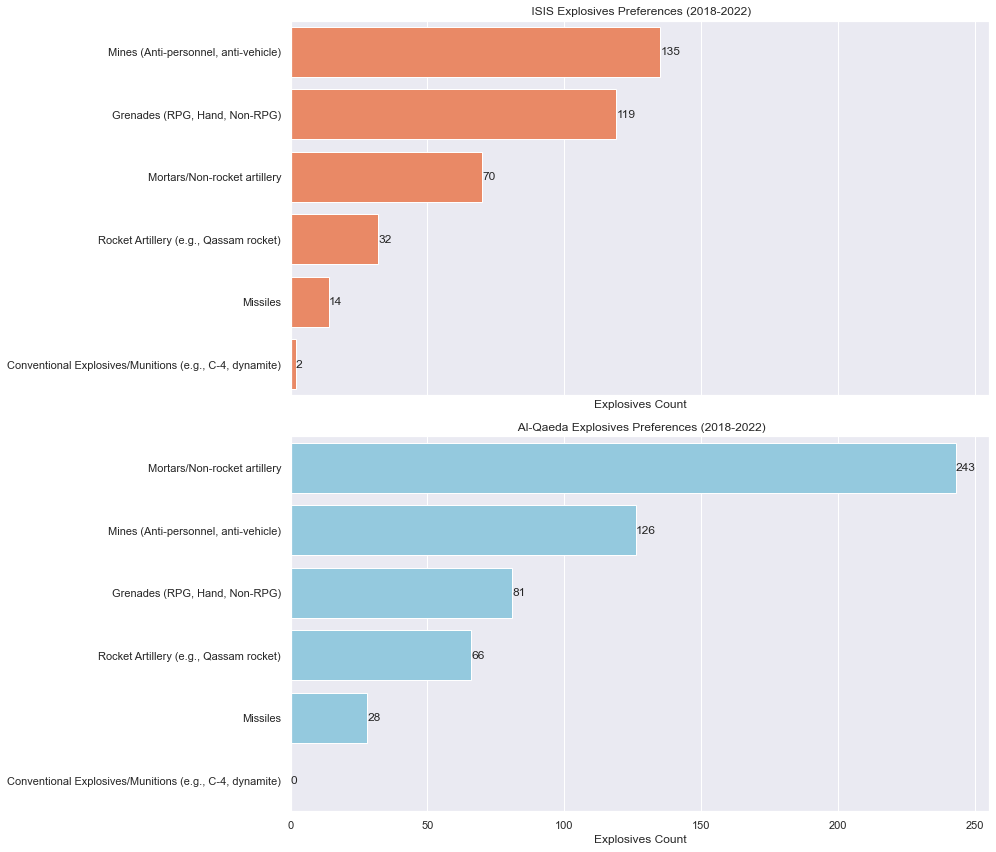

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('D:/sem 4/DAEN 690/Project/sprint 3/GRID_PERPS_ISIS_ALQAIDA_NEW.csv')  
# Renaming columns
column_name_mapping = {
    'weapon_lvl2_ex_02': 'Rocket Artillery (e.g., Qassam rocket)',
    'weapon_lvl2_ex_03': 'Mortars/Non-rocket artillery',
    'weapon_lvl2_ex_04': 'Conventional Explosives/Munitions (e.g., C-4, dynamite)',
    'weapon_lvl2_ex_05': 'Grenades (RPG, Hand, Non-RPG)',
    'weapon_lvl2_ex_06': 'Mines (Anti-personnel, anti-vehicle)',
    'weapon_lvl2_ex_07': 'Missiles'
}

# Rename columns in the dataset
data_renamed = data.rename(columns=column_name_mapping)

# Filter the dataset for incidents related to ISIS and Al Qaeda
isis_data = data_renamed[data_renamed['affiliated_organization'] == 'ISIS']
alqaida_data = data_renamed[data_renamed['affiliated_organization'] == 'Al-Qaeda']

# Compute the frequency of each weapon category for ISIS and Al Qaeda
weapon_frequencies_isis = isis_data[list(column_name_mapping.values())].sum()
weapon_frequencies_alqaida = alqaida_data[list(column_name_mapping.values())].sum()

# Sort the frequencies in descending order and get the top 10
top_weapons_isis = weapon_frequencies_isis.sort_values(ascending=False).head(10)
top_weapons_alqaida = weapon_frequencies_alqaida.sort_values(ascending=False).head(10)

# Create the bar charts
sns.set(style="darkgrid")
# Custom colors for ISIS and Al-Qaeda
isis_color = "#FF7F50"  # Coral color for ISIS
alqaeda_color = "#87CEEB"  # Sky blue color for Al-Qaeda

fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# ISIS bar chart
sns.barplot(x=top_weapons_isis.values, y=top_weapons_isis.index, ax=axes[0], color=isis_color)
axes[0].set_title(' ISIS Explosives Preferences (2018-2022)')
axes[0].set_xlabel('Explosives Count')
axes[0].set_ylabel('')

# Al Qaeda bar chart
sns.barplot(x=top_weapons_alqaida.values, y=top_weapons_alqaida.index, ax=axes[1], color=alqaeda_color)
axes[1].set_title(' Al-Qaeda Explosives Preferences (2018-2022)')
axes[1].set_xlabel('Explosives Count')
axes[1].set_ylabel('')

# Adding count annotations to the bars
for ax in axes:
    for p in ax.patches:
        width = p.get_width()
        ax.text(width, p.get_y() + p.get_height() / 2,
                f'{int(width)}',  # Using f-string for formatting
                va='center')

# Adjust layout
plt.tight_layout()
plt.show()


###   INCENDIARY Preferences by ISIS and Al-Qaeda 

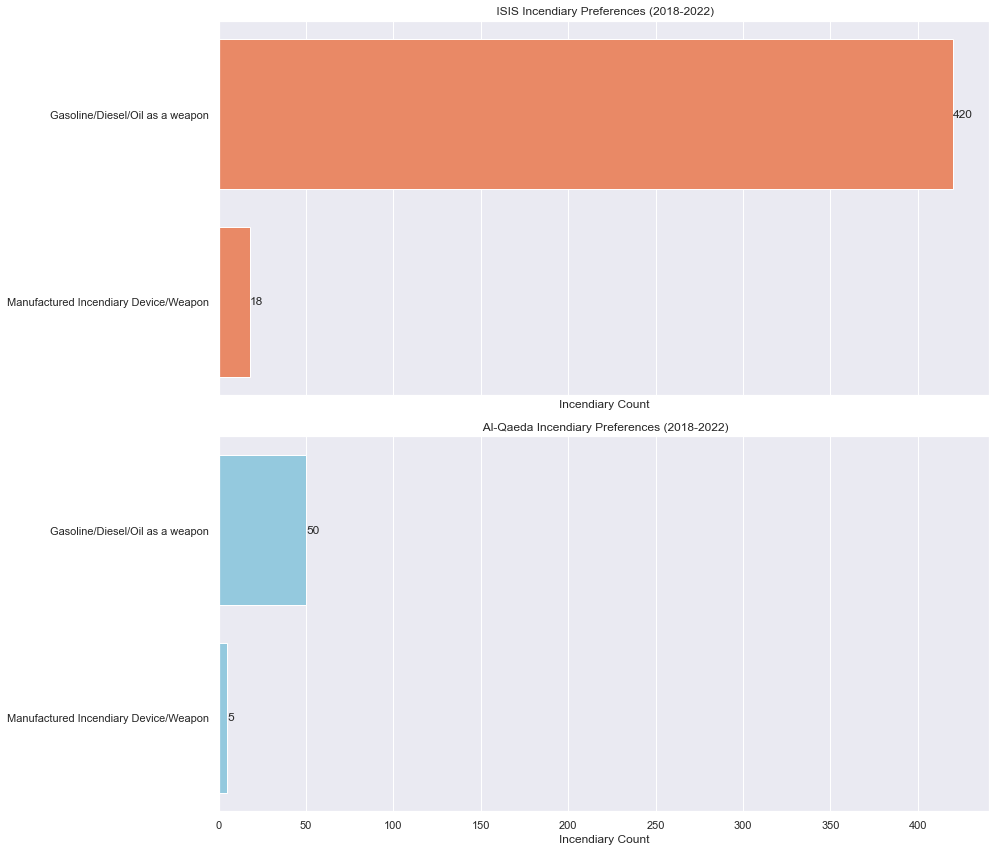

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('D:/sem 4/DAEN 690/Project/sprint 3/GRID_PERPS_ISIS_ALQAIDA_NEW.csv')  
# Renaming columns
column_name_mapping = {
    'weapon_lvl2_in_03': 'Manufactured Incendiary Device/Weapon',
    'weapon_lvl2_in_04': 'Gasoline/Diesel/Oil as a weapon',
}
sns.set_style("darkgrid")
# Rename columns in the dataset
data_renamed = data.rename(columns=column_name_mapping)

# Filter the dataset for incidents related to ISIS and Al Qaeda
isis_data = data_renamed[data_renamed['affiliated_organization'] == 'ISIS']
alqaida_data = data_renamed[data_renamed['affiliated_organization'] == 'Al-Qaeda']

# Compute the frequency of each weapon category for ISIS and Al Qaeda
weapon_frequencies_isis = isis_data[list(column_name_mapping.values())].sum()
weapon_frequencies_alqaida = alqaida_data[list(column_name_mapping.values())].sum()

# Sort the frequencies in descending order and get the top 10
top_weapons_isis = weapon_frequencies_isis.sort_values(ascending=False).head(10)
top_weapons_alqaida = weapon_frequencies_alqaida.sort_values(ascending=False).head(10)

# Create the bar charts
sns.set(style="darkgrid")

# Custom colors for ISIS and Al-Qaeda
isis_color = "#FF7F50"  # Coral color for ISIS
alqaeda_color = "#87CEEB"  # Sky blue color for Al-Qaeda

fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# ISIS bar chart
sns.barplot(x=top_weapons_isis.values, y=top_weapons_isis.index, ax=axes[0], color=isis_color)
axes[0].set_title(' ISIS Incendiary Preferences (2018-2022)')
axes[0].set_xlabel('Incendiary Count')
axes[0].set_ylabel('')

# Al Qaeda bar chart
sns.barplot(x=top_weapons_alqaida.values, y=top_weapons_alqaida.index, ax=axes[1], color=alqaeda_color)
axes[1].set_title(' Al-Qaeda Incendiary Preferences (2018-2022)')
axes[1].set_xlabel('Incendiary Count')
axes[1].set_ylabel('')

# Adding count annotations to the bars
for ax in axes:
    for p in ax.patches:
        width = p.get_width()
        ax.text(width, p.get_y() + p.get_height() / 2,
                f'{int(width)}',  # Using f-string for formatting
                va='center')

# Adjust layout
plt.tight_layout()
plt.show()


###   MELEE Preferences by ISIS and Al-Qaeda 

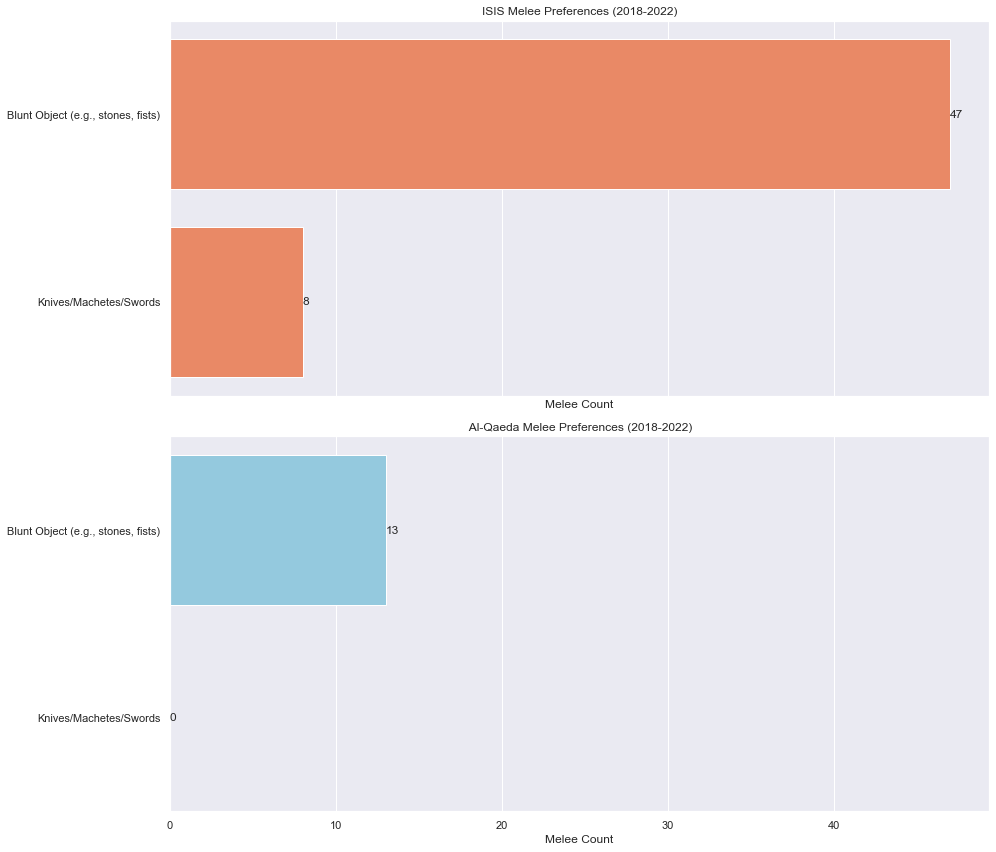

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
 
data = pd.read_csv('D:/sem 4/DAEN 690/Project/sprint 3/GRID_PERPS_ISIS_ALQAIDA_NEW.csv') 
# Renaming columns
column_name_mapping = {
    'weapon_lvl2_ml_02': 'Knives/Machetes/Swords',
    'weapon_lvl2_ml_03': 'Blunt Object (e.g., stones, fists)',
}
sns.set_style("darkgrid")
# Rename columns in the dataset
data_renamed = data.rename(columns=column_name_mapping)

# Filter the dataset for incidents related to ISIS and Al Qaeda
isis_data = data_renamed[data_renamed['affiliated_organization'] == 'ISIS']
alqaida_data = data_renamed[data_renamed['affiliated_organization'] == 'Al-Qaeda']

# Compute the frequency of each weapon category for ISIS and Al Qaeda
weapon_frequencies_isis = isis_data[list(column_name_mapping.values())].sum()
weapon_frequencies_alqaida = alqaida_data[list(column_name_mapping.values())].sum()

# Sort the frequencies in descending order and get the top 10
top_weapons_isis = weapon_frequencies_isis.sort_values(ascending=False).head(10)
top_weapons_alqaida = weapon_frequencies_alqaida.sort_values(ascending=False).head(10)

# Create the bar charts
sns.set(style="darkgrid")
# Custom colors for ISIS and Al-Qaeda
isis_color = "#FF7F50"  # Coral color for ISIS
alqaeda_color = "#87CEEB"  # Sky blue color for Al-Qaeda

fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# ISIS bar chart
sns.barplot(x=top_weapons_isis.values, y=top_weapons_isis.index, ax=axes[0], color=isis_color)
axes[0].set_title('ISIS Melee Preferences (2018-2022)')
axes[0].set_xlabel('Melee Count')
axes[0].set_ylabel('')

# Al Qaeda bar chart
sns.barplot(x=top_weapons_alqaida.values, y=top_weapons_alqaida.index, ax=axes[1], color=alqaeda_color)
axes[1].set_title(' Al-Qaeda Melee Preferences (2018-2022)')
axes[1].set_xlabel('Melee Count')
axes[1].set_ylabel('')

# Adding count annotations to the bars
for ax in axes:
    for p in ax.patches:
        width = p.get_width()
        ax.text(width, p.get_y() + p.get_height() / 2,
                f'{int(width)}',  # Using f-string for formatting
                va='center')

# Adjust layout
plt.tight_layout()
plt.show()
